In [41]:
pip install train

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for train: filename=train-0.0.5-py3-none-any.whl size=8503 sha256=45bc2d458c714c80340018a139d038c0f50dd2043904686d1cce271b0ed22929
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\b5\20\c5\a817b3416832aadd9b2f0cb859ef4efb1afadf3cf0fd619f00
Successfully built train
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


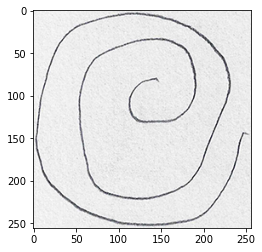

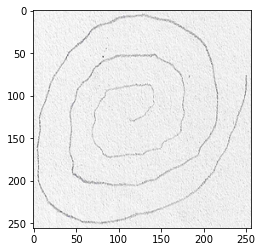

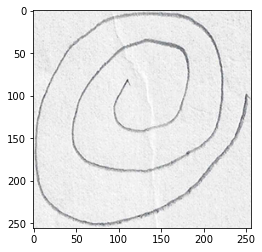

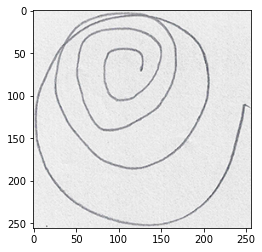

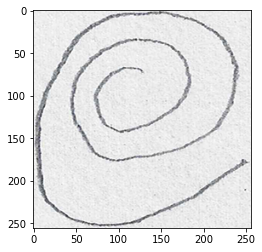

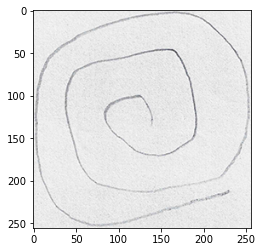

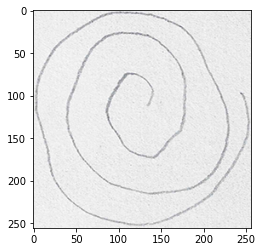

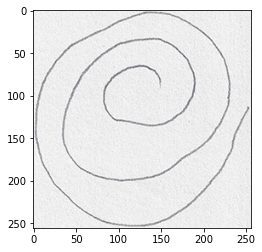

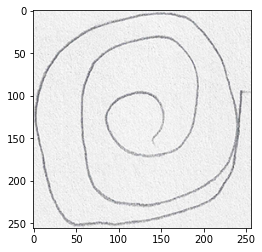

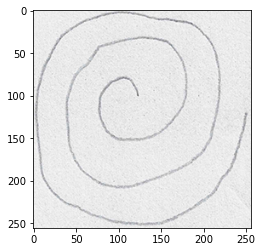

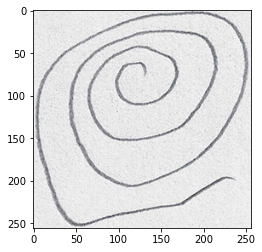

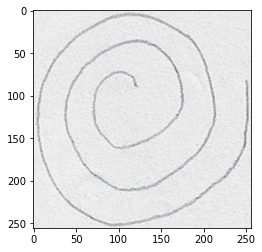

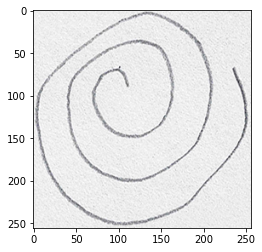

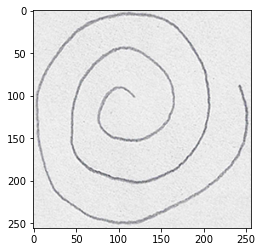

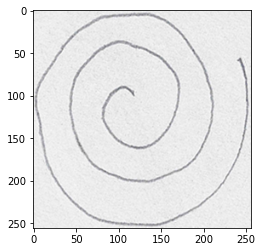

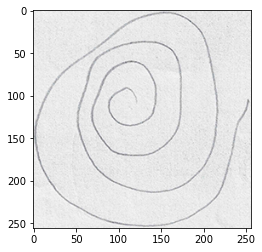

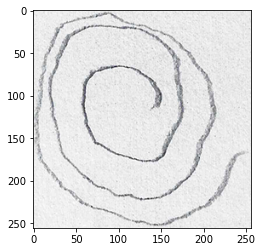

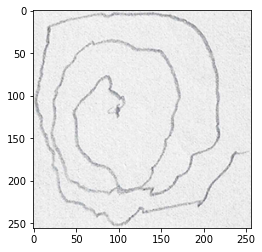

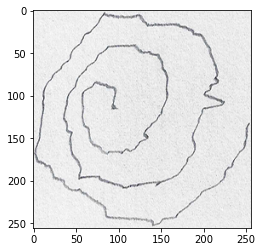

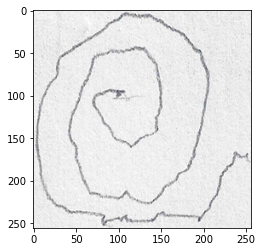

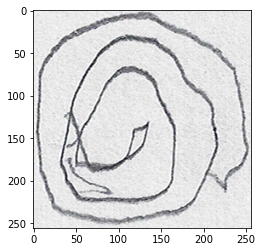

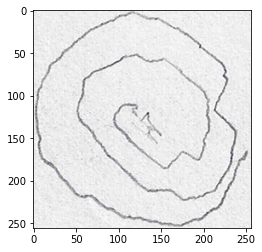

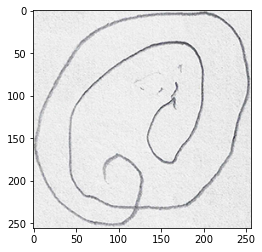

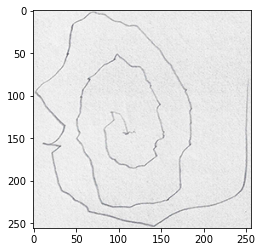

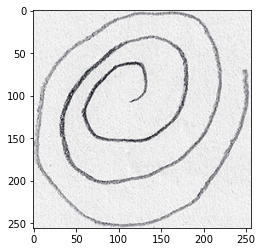

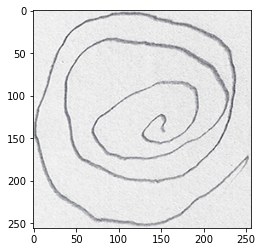

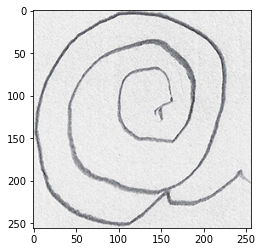

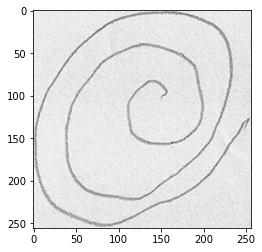

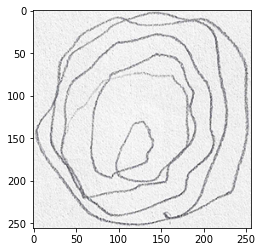

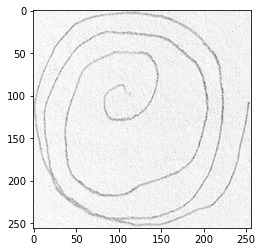

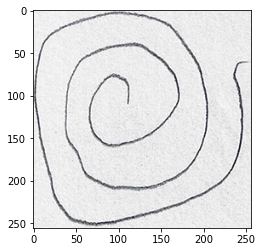

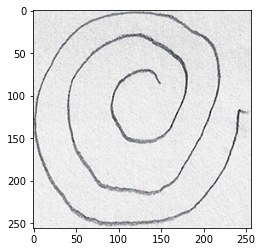

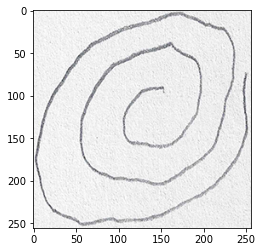

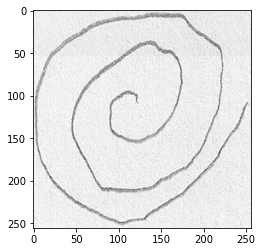

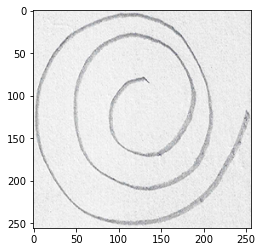

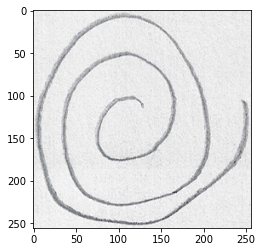

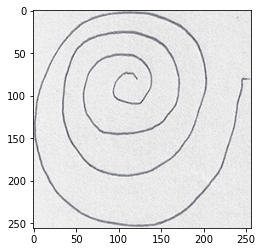

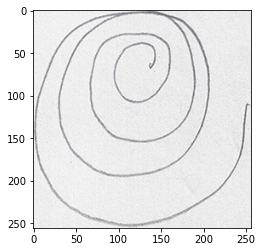

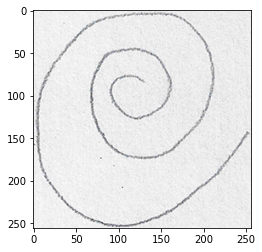

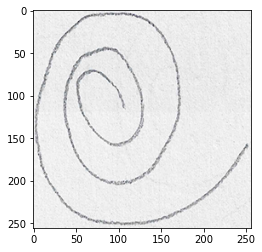

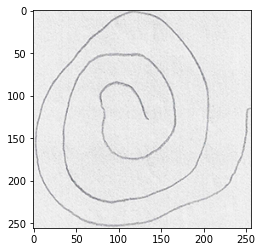

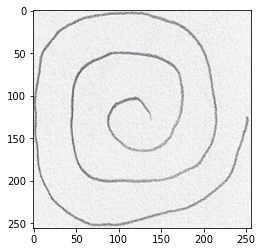

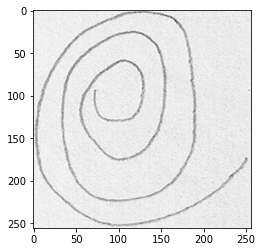

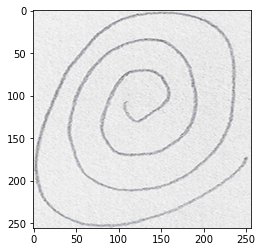

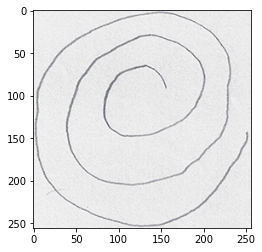

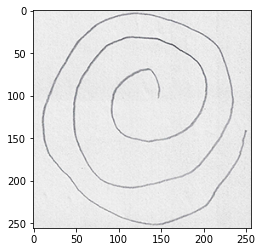

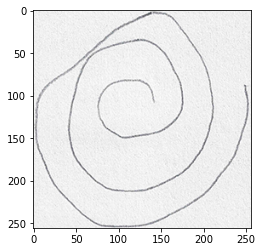

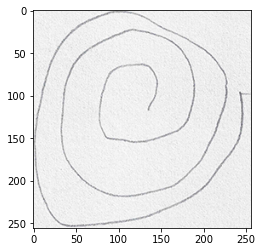

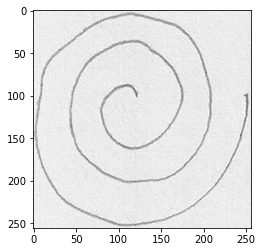

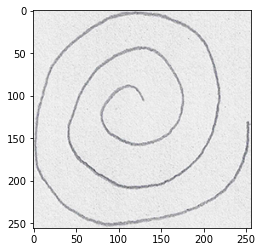

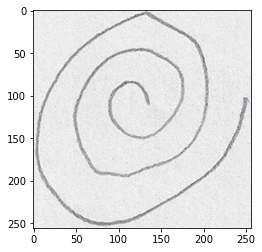

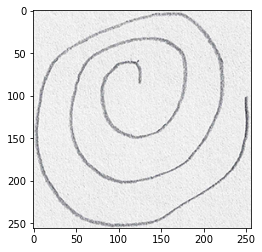

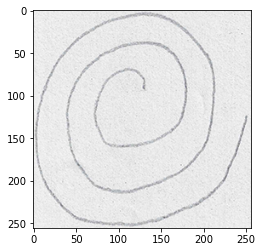

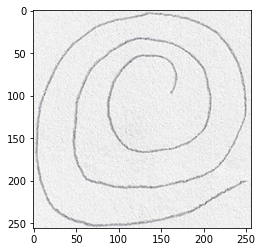

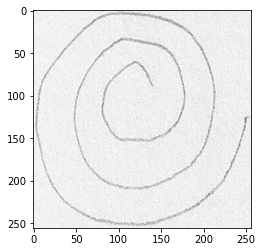

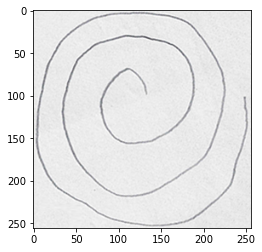

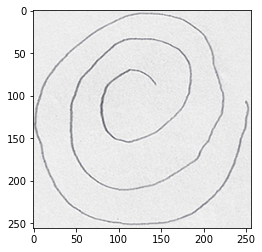

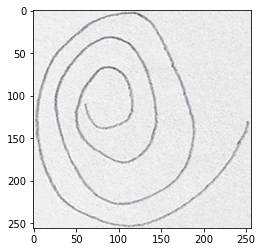

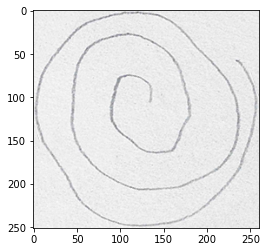

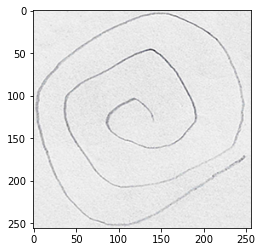

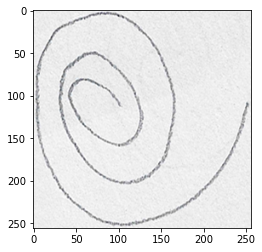

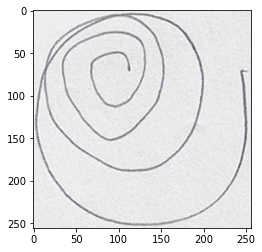

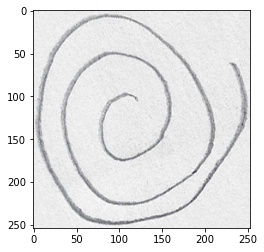

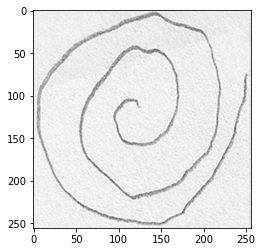

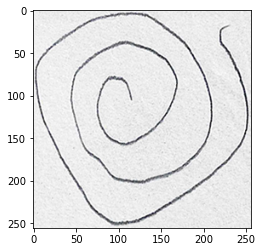

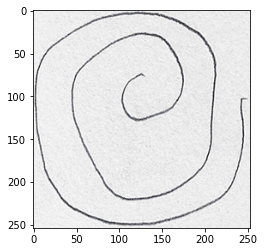

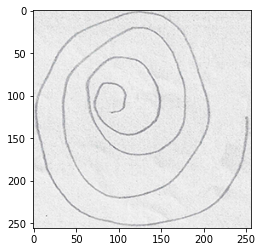

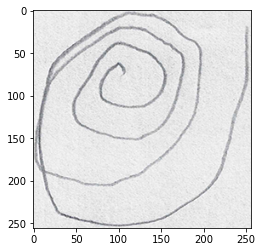

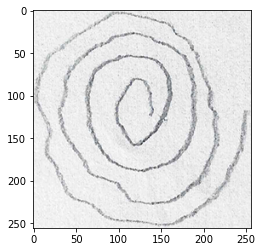

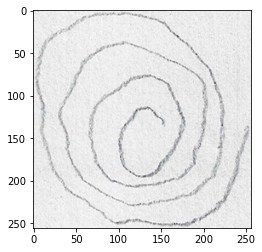

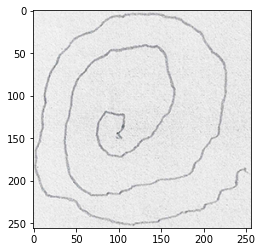

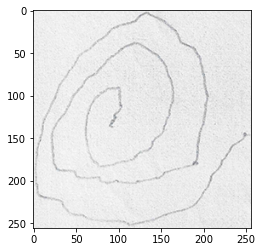

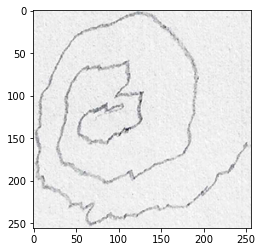

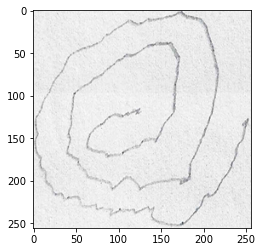

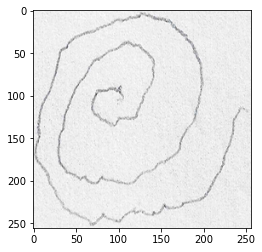

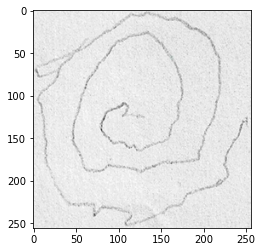

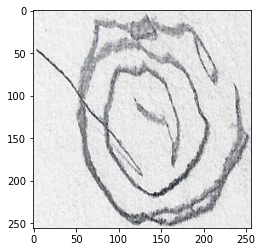

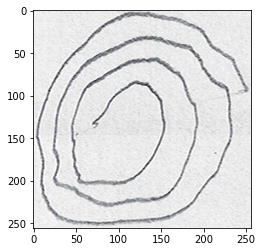

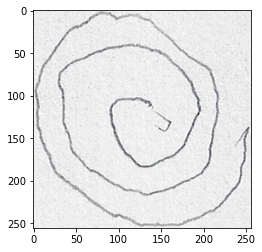

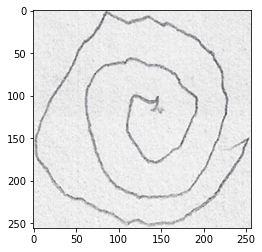

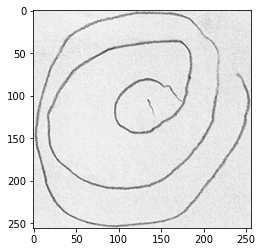

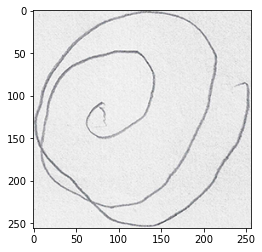

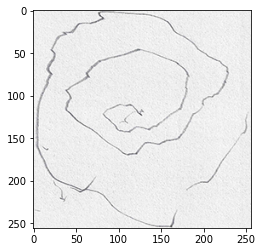

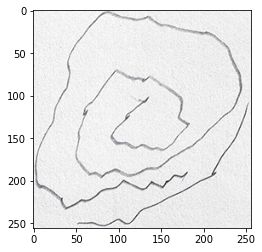

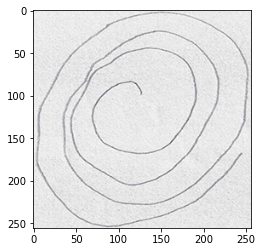

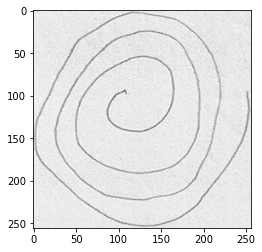

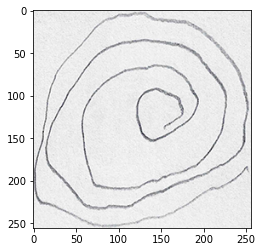

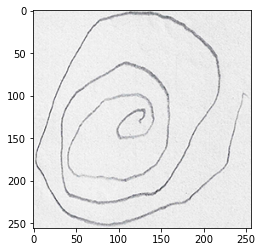

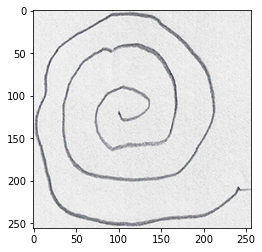

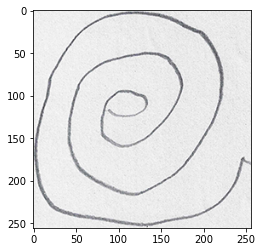

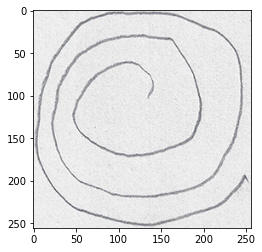

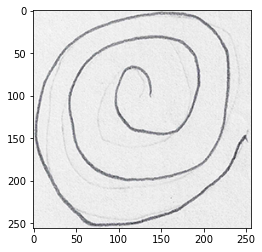

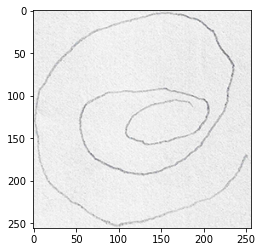

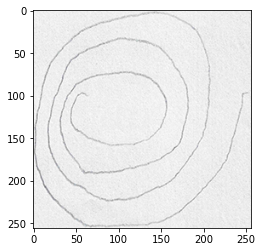

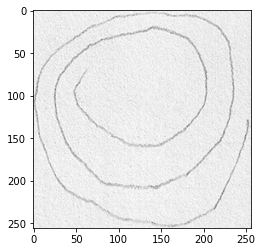

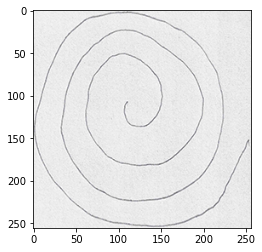

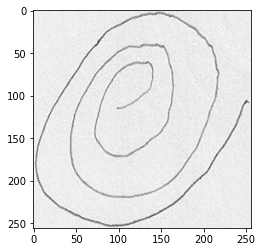

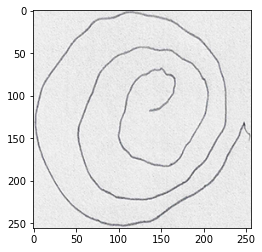

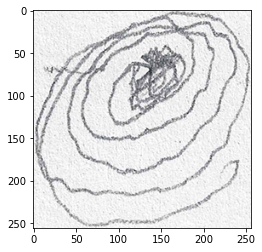

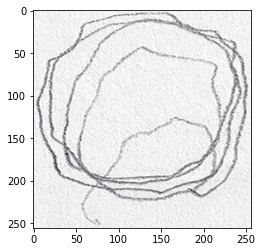

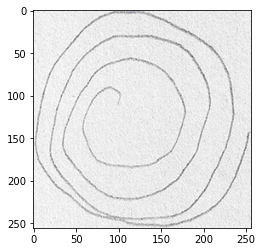

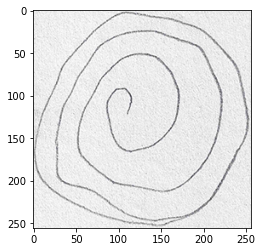

In [3]:
import matplotlib.pyplot as plt

root_folder = "C:/Users/Admin/JupyterProjectas/Files_modified/drawings"

for subdir, dirs, files in os.walk(root_folder):
    for file in files:
        filepath = subdir + os.sep + file
        if filepath.endswith(".png"):
            # Load image using OpenCV
            img = cv2.imread(filepath)

            # Convert BGR to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Display the image using Matplotlib
            plt.imshow(img)
            plt.show()


In [130]:
import os
import numpy as np

# Define the paths to the training and testing folders
train_folder = "C:/Users/Admin/JupyterProjectas/Files_modified/drawings/spiral/training"
test_folder = "C:/Users/Admin/JupyterProjectas/Files_modified/drawings/spiral/testing"

# Create lists to store the training and testing data
train_data = []
train_labels = []
test_data = []
test_labels = []

# Loop through the subfolders in the training folder
for subfolder in os.listdir(train_folder):
    subfolder_path = os.path.join(train_folder, subfolder)
    for image_path in os.listdir(subfolder_path):
        # Load the image using OpenCV and convert it to a numpy array
        image = cv2.imread(os.path.join(subfolder_path, image_path))
        image = np.array(image)
        # Add the image to the training data list
        train_data.append(image)
        # Assign binary labels to the images
        if subfolder == "healthy":
            train_labels.append(0)
        else:
            train_labels.append(1)

# Loop through the subfolders in the testing folder
for subfolder in os.listdir(test_folder):
    subfolder_path = os.path.join(test_folder, subfolder)
    for image_path in os.listdir(subfolder_path):
        # Load the image using OpenCV and convert it to a numpy array
        image = cv2.imread(os.path.join(subfolder_path, image_path))
        image = np.array(image)
        # Add the image to the testing data list
        test_data.append(image)
        # Assign binary labels to the images
        if subfolder == "healthy":
            test_labels.append(0)
        else:
            test_labels.append(1)



In [131]:
# Convert the lists to numpy arrays
train_data = np.array(train_data)
train_labels = np.array(train_labels)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

C:\Users\Admin\AppData\Local\Temp/ipykernel_14976/252096513.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_data = np.array(train_data)


In [132]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(train_data, train_labels, test_size=0.2, random_state=42)


In [133]:
np.save("C:/Users/Admin/JupyterProjectas/Files_modified/spiral_images.npy", train_data)
np.save("C:/Users/Admin/JupyterProjectas/Files_modified/spiral_labels.npy", train_labels)


In [134]:
np.save("C:/Users/Admin/JupyterProjectas/Files_modified/test_images.npy", test_data)
np.save("C:/Users/Admin/JupyterProjectas/Files_modified/test_labels.npy", test_labels)

In [135]:
x = np.load("C:/Users/Admin/JupyterProjectas/Files_modified/spiral_images.npy")
y = np.load("C:/Users/Admin/JupyterProjectas/Files_modified/spiral_labels.npy")

ValueError: Object arrays cannot be loaded when allow_pickle=False

In [136]:
# Split the data into training and validation sets
x_train, x_val = x[:int(x.shape[0]*0.8)], x[int(x.shape[0]*0.8):]
y_train, y_val = y[:int(y.shape[0]*0.8)], y[int(y.shape[0]*0.8):]


In [137]:
y_train

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson'], dtype='<U9')

In [116]:
# Define the image data generator for image augmentation
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

In [117]:
# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [118]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [119]:
from sklearn.preprocessing import LabelEncoder

In [120]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_val = le.transform(y_val)

In [121]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))


Epoch 1/10
2/2 [==============================] - 6s 3s/step - loss: 892.1626 - accuracy: 0.4561 - val_loss: 1054.9856 - val_accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 5s 3s/step - loss: 216.0355 - accuracy: 0.5789 - val_loss: 2.0643e-19 - val_accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 6s 3s/step - loss: 16.6113 - accuracy: 0.4386 - val_loss: 1.1308 - val_accuracy: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 6s 3s/step - loss: 2.5924 - accuracy: 0.5965 - val_loss: 2.0815e-11 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 5s 2s/step - loss: 11.0813 - accuracy: 0.4912 - val_loss: 12.0954 - val_accuracy: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 5s 3s/step - loss: 3.5610 - accuracy: 0.6316 - val_loss: 0.6666 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 5s 2s/step - loss: 0.7626 - accuracy: 0.4035 - val_loss: 1.6483 - val_accuracy: 0.0000e+00
Epoch 8

In [122]:
val_loss, val_acc = model.evaluate(x_val, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)

1/1 [==============================] - 0s 356ms/step - loss: 0.7728 - accuracy: 0.0000e+00
Validation Loss: 0.7727918028831482
Validation Accuracy: 0.0
